In [66]:
# Import Library

import warnings
warnings.filterwarnings('ignore')  # Hilangkan semua warning

# kebutuhan dasar 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# kebutuhan model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# evaluasi model
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [67]:
# Load data
df = pd.read_csv('./datasets/data.csv')

# Drop kolom ID yang tidak digunakan
df.drop('customerID', axis=1, inplace=True)

# Ubah kolom TotalCharges jadi numerik dan isi missing value
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Label encoding untuk semua kolom bertipe object
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [68]:
# Pisahkan fitur dan target
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [69]:
# deklarasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [70]:
# fit ke-3 model
results = []

for name, model in models.items():
    print(f"Model: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Akurasi (%)": acc * 100,
        "F1-Score (%)": f1 * 100
    })
    
    print(f"Akurasi: {acc * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    # print("Classification Report:")
    # print(classification_report(y_test, y_pred, target_names=["Tidak Churn", "Churn"]))
    print("-" * 40)

Model: Logistic Regression
Akurasi: 81.69%
F1-Score: 62.72%
----------------------------------------
Model: Random Forest
Akurasi: 79.56%
F1-Score: 55.00%
----------------------------------------
Model: XGBoost
Akurasi: 79.42%
F1-Score: 57.23%
----------------------------------------


In [71]:
# Perbandingan hasil
results_df = pd.DataFrame(results).sort_values(
    by="F1-Score (%)", ascending=False)

print(results_df.round(2))

                 Model  Akurasi (%)  F1-Score (%)
0  Logistic Regression        81.69         62.72
2              XGBoost        79.42         57.23
1        Random Forest        79.56         55.00


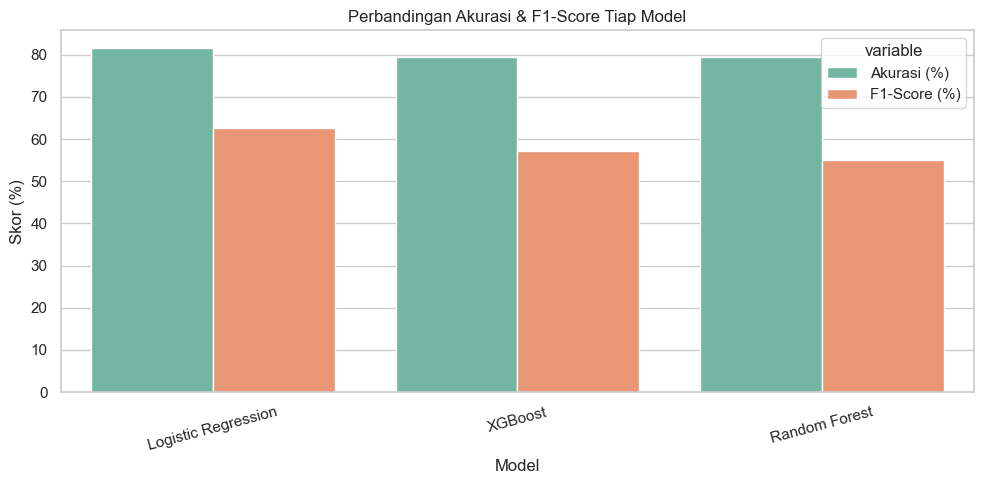

In [72]:
# Visualisasi hasil
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.melt(id_vars='Model'),
            x='Model', y='value', hue='variable', palette='Set2')

plt.title('Perbandingan Akurasi & F1-Score Tiap Model')
plt.ylabel('Skor (%)')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [73]:
# Data pelanggan baru (sudah sesuai format dan urutan X.columns)
new_data = pd.DataFrame([
    {
        'gender': 1,
        'SeniorCitizen': 0,
        'Partner': 1,
        'Dependents': 0,
        'tenure': 5,
        'PhoneService': 1,
        'MultipleLines': 1,
        'InternetService': 1,
        'OnlineSecurity': 0,
        'OnlineBackup': 1,
        'DeviceProtection': 0,
        'TechSupport': 0,
        'StreamingTV': 1,
        'StreamingMovies': 1,
        'Contract': 0,
        'PaperlessBilling': 1,
        'PaymentMethod': 2,
        'MonthlyCharges': 70.5,
        'TotalCharges': 350.0
    },
    {
        'gender': 0,
        'SeniorCitizen': 1,
        'Partner': 0,
        'Dependents': 0,
        'tenure': 2,
        'PhoneService': 1,
        'MultipleLines': 0,
        'InternetService': 0,
        'OnlineSecurity': 0,
        'OnlineBackup': 0,
        'DeviceProtection': 0,
        'TechSupport': 0,
        'StreamingTV': 0,
        'StreamingMovies': 0,
        'Contract': 0,
        'PaperlessBilling': 1,
        'PaymentMethod': 1,
        'MonthlyCharges': 55.0,
        'TotalCharges': 110.0
    },
    {
        'gender': 1,
        'SeniorCitizen': 0,
        'Partner': 1,
        'Dependents': 1,
        'tenure': 30,
        'PhoneService': 1,
        'MultipleLines': 1,
        'InternetService': 1,
        'OnlineSecurity': 1,
        'OnlineBackup': 1,
        'DeviceProtection': 1,
        'TechSupport': 1,
        'StreamingTV': 1,
        'StreamingMovies': 1,
        'Contract': 2,
        'PaperlessBilling': 0,
        'PaymentMethod': 0,
        'MonthlyCharges': 85.9,
        'TotalCharges': 2600.5
    },
    {
        'gender': 0,
        'SeniorCitizen': 0,
        'Partner': 0,
        'Dependents': 0,
        'tenure': 10,
        'PhoneService': 1,
        'MultipleLines': 1,
        'InternetService': 2,
        'OnlineSecurity': 0,
        'OnlineBackup': 0,
        'DeviceProtection': 0,
        'TechSupport': 0,
        'StreamingTV': 0,
        'StreamingMovies': 0,
        'Contract': 1,
        'PaperlessBilling': 0,
        'PaymentMethod': 3,
        'MonthlyCharges': 29.0,
        'TotalCharges': 290.0
    },
    {
        'gender': 1,
        'SeniorCitizen': 1,
        'Partner': 1,
        'Dependents': 0,
        'tenure': 1,
        'PhoneService': 0,
        'MultipleLines': 0,
        'InternetService': 0,
        'OnlineSecurity': 0,
        'OnlineBackup': 0,
        'DeviceProtection': 0,
        'TechSupport': 0,
        'StreamingTV': 0,
        'StreamingMovies': 0,
        'Contract': 0,
        'PaperlessBilling': 1,
        'PaymentMethod': 2,
        'MonthlyCharges': 19.5,
        'TotalCharges': 19.5
    }
])

In [74]:
for name, model in models.items():
    print(f"\n Prediksi oleh model: {name}")
    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)

    for i, (pred, proba) in enumerate(zip(predictions, probabilities)):
        status = "Churn" if pred == 1 else "Tidak Churn"
        print(f"Pelanggan #{i+1}: {status} (Probabilitas churn: {proba[1]*100:.2f}%)")


 Prediksi oleh model: Logistic Regression
Pelanggan #1: Churn (Probabilitas churn: 62.83%)
Pelanggan #2: Churn (Probabilitas churn: 55.50%)
Pelanggan #3: Tidak Churn (Probabilitas churn: 6.79%)
Pelanggan #4: Tidak Churn (Probabilitas churn: 20.45%)
Pelanggan #5: Churn (Probabilitas churn: 63.81%)

 Prediksi oleh model: Random Forest
Pelanggan #1: Churn (Probabilitas churn: 62.00%)
Pelanggan #2: Tidak Churn (Probabilitas churn: 50.00%)
Pelanggan #3: Tidak Churn (Probabilitas churn: 2.00%)
Pelanggan #4: Tidak Churn (Probabilitas churn: 14.00%)
Pelanggan #5: Churn (Probabilitas churn: 85.00%)

 Prediksi oleh model: XGBoost
Pelanggan #1: Churn (Probabilitas churn: 76.69%)
Pelanggan #2: Churn (Probabilitas churn: 63.68%)
Pelanggan #3: Tidak Churn (Probabilitas churn: 0.05%)
Pelanggan #4: Tidak Churn (Probabilitas churn: 9.17%)
Pelanggan #5: Churn (Probabilitas churn: 71.49%)


## 🧠 Analisis Mengapa Logistic Regression Unggul

Berikut alasan mengapa model **Logistic Regression** memberikan performa terbaik pada dataset churn ini:

---

### ✅ Karakteristik Dataset:
- Dataset berisi sekitar **7.000 baris**, tergolong kecil untuk model kompleks seperti Random Forest atau XGBoost.
- Fitur numerik utama seperti `tenure`, `MonthlyCharges`, dan `TotalCharges` memiliki **hubungan linier** terhadap kemungkinan churn.
- Sebagian besar fitur kategorikal seperti `Contract`, `PaperlessBilling`, dan `InternetService` setelah di-label encoding, **berperilaku seperti fitur biner** yang mudah ditangani Logistic Regression.
- Target `Churn` sedikit **imbalanced (~26%)**, Logistic Regression lebih **stabil** terhadap imbalance tanpa perlu penyesuaian berat kelas.

---

### 🎯 Kesimpulan:
Karena hubungan antar fitur dan label cenderung **linier**, dataset relatif kecil, dan distribusi tidak terlalu seimbang, maka **Logistic Regression mampu menangkap pola utama secara efisien tanpa overfitting**, menjadikannya model terbaik dalam eksperimen ini.


| Model                   | Kelebihan                                                                                                                         | Kelemahan                                                                     |
| ----------------------- | --------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| **Logistic Regression** | 🔹 Cepat dan ringan<br>🔹 Mudah diinterpretasi<br>🔹 Stabil untuk data linier kecil                                               | 🔸 Tidak bisa tangkap relasi non-linear<br>🔸 Kurang fleksibel                |
| **Random Forest**       | 🔹 Menangani data tabular dengan baik<br>🔹 Robust terhadap outlier<br>🔹 Bisa eksplorasi non-linearitas                          | 🔸 Bisa overfitting di data kecil<br>🔸 Kurang bagus di prediksi probabilitas |
| **XGBoost**             | 🔹 Sangat kuat di data tabular besar<br>🔹 Bisa menangani missing, imbalance, dan feature interaction<br>🔹 Bagus dalam kompetisi | 🔸 Butuh tuning parameter<br>🔸 Training lebih lambat dibanding LogReg        |
